# Penguins Project

The following project was completed by
- Angela Fan
- Liana Huang
- Diana Tran

for the 2022 Spring PIC 16A course (M. Murray).

**Statement**
All three of us wrote the data acquisition and preparation section. Diana and Angela led Exploratory Analysis figures and tables, while Liana led the automated Feature Selection model. Liana cleaned up the common modeling functions. Angela led the Random Forest Classifer model.
Diana led the Neural Network model. Liana led the Support Vector Machines model.
We all wrote the conclusion and checked each other's work through revisions to code and writing.

# Overview

An important task in the ecology of the Antarctic is to catalog the many different species of penguins in that area. Determining the species of a penguin often requires a combination of biological expertise and many precise measurements, which can be difficult to obtain. But there are too many penguins to manually catalog. We assessed the Palmer Penguin dataset to understand which measurements are most representative for distinguishing the different penguin species.

For training and evaluating your models, we will use the Palmer Penguins data set. The Palmer Penguins data set was collected by collected by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/.), a member of the [Long Term Ecological Research Network](https://lternet.edu/.). Download the [CSV](https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv.) data. It contains measurements on three penguin species: Chinstrap, Gentoo, and Adelie.

# Data Import and Cleaning

The Palmer's Penguin dataset was provided by our instructor who in turn had taken it from the open source data provided the Palmer Station team.

The workflow is as follows
- check dataframe contents
- check features for NA values
- subset for relevant features that may influence target approximation
- spliting entire frame into train and test set
- reencode qualitative/categorical variables into numerical representations
- apply reencoding onto data subsets

To do this, you will need to install a few software packages if you do not have them yet:
- Python
- Pandas
- Matplotlib.pyplot
- Sklearn
- numPY
- Seaborn

The dataset is also listed in the block.

First import all the package dependencies for Data Importing and Cleaning. As you move through this notebook, other dependencies will be added as needed. Once we have read the Penguins file into a Pandas dataframe we can examine the first five rows of data using the head() command. Note all the feature columns given.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
import seaborn as sns

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We can also check for the total number of NA values per column. This affects our later analysis.

In [ ]:
penguins.isnull().sum() #check number of NAs in each col of penguins

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

As mentioned above, there are alot of features; many of which have no bearing on the type of species such as Individual ID, Stage, studyName, Sample Number, Clutch Completion, Date Egg, Comments, and Region. We will quickly subset for the feature columns that may influence species type.

In [ ]:
penguins = penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
                     'Body Mass (g)','Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
penguins["Species"] = penguins["Species"].str.split().str.get(0) #shorten the species name
penguins

<ipython-input-4-31a4ee4e0a30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Species"] = penguins["Species"].str.split().str.get(0) #shorten the species name


,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


Before we can feed our data set into a machine learning algorithm, we have to remove missing values and split it into training and test sets. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column. Now we need to format the remaining data, particularly the categorical data, in a way that our machine learning algorithms will accept. This is done using the LabelEncoder() which will reassign numerical representations for string values.

In [ ]:
def prep_penguins(data_df):
    """
    Prepare and clean the penguins data frame. Drop all NaN values, re-encode qualitative data as numeric data.
    Returns X, the training data, and y, the target Species data.
    """
    df = data_df.copy()
    df = df.dropna()

    #re-encode qualitative data into numerical
    le = preprocessing.LabelEncoder()
    df['Island'] = le.fit_transform(df['Island'])  #where Biscoe = 0, Dream = 1, and Torgersen = 2
    df['Species'] =  le.fit_transform(df['Species']) #where Adelie = 0, Chinstrap = 1, and Gentoo = 2
    df['Sex'] = le.fit_transform(df['Sex'])  #where Female = 0 and Male = 1

    X = df.drop(['Species'], axis = 1) #the training data without the Species column
    y = df['Species'] #the target Species data

    return(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(penguins, test_size = 0.2) # hold out 20% of data
X_train, y_train = prep_penguins(train)
X_test,  y_test  = prep_penguins(test)

# Exploratory Analysis

To better understand the penguins data set,

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
penguins.groupby("Species").describe() #summary stats grouped by penguin species

Culmen Length (mm)                                                   \
                       count       mean       std   min    25%    50%     75%   
Species                                                                         
Adelie                 151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap               68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo                 123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                Culmen Depth (mm)                                          \
            max             count       mean       std   min   25%    50%   
Species                                                                     
Adelie     46.0             151.0  18.346358  1.216650  15.5  17.5  18.40   
Chinstrap  58.0              68.0  18.420588  1.135395  16.4  17.5  18.45   
Gentoo     59.6             123.0  14.982114  0.981220  13.1  14.2  15.00   

                      Flipper Length (mm)                                      \
            75%   max               count        mean       std    min    25%   
Species                                                                         
Adelie     19.0  21.5               151.0  189.953642  6.539457  172.0  186.0   
Chinstrap  19.4  20.8                68.0  195.823529  7.131894  178.0  191.0   
Gentoo     15.7  17.3               123.0  217.186992  6.484976  203.0  212.0   

                               Body Mass (g)                                   \
             50%    75%    max         count         mean         std     min   
Species                                                                         
Adelie     190.0  195.0  210.0         151.0  3700.662252  458.566126  2850.0   
Chinstrap  196.0  201.0  212.0          68.0  3733.088235  384.335081  2700.0   
Gentoo     216.0  221.0  231.0         123.0  5076.016260  504.116237  3950.0   

                                          Delta 15 N (o/oo)            \
              25%     50%     75%     max             count      mean   
Species                                                                 
Adelie     3350.0  3700.0  4000.0  4775.0             141.0  8.859733   
Chinstrap  3487.5  3700.0  3950.0  4800.0              67.0  9.356155   
Gentoo     4700.0  5000.0  5500.0  6300.0             122.0  8.245338   

                                                                     \
                std      min       25%      50%       75%       max   
Species                                                               
Adelie     0.426217  7.69778  8.567080  8.88098  9.153080   9.79532   
Chinstrap  0.368720  8.47173  9.103675  9.37369  9.620455  10.02544   
Gentoo     0.264470  7.63220  8.102775  8.25117  8.418402   8.83352   

          Delta 13 C (o/oo)                                            \
                      count       mean       std       min        25%   
Species                                                                 
Adelie                141.0 -25.804194  0.588186 -26.78958 -26.230270   
Chinstrap              68.0 -24.546542  0.238809 -25.14550 -24.685153   
Gentoo                122.0 -26.185298  0.538554 -27.01854 -26.690912   

                                           
                 50%        75%       max  
Species                                    
Adelie    -25.976960 -25.298050 -23.90309  
Chinstrap -24.572375 -24.400333 -23.78767  
Gentoo    -26.221575 -25.640160 -25.00169

> This table shows the summary stats of the penguins grouped by species. It looks like Gentoo penguins are the heaviest, but Chinstrap and Adelie penguins are more similar in terms of body mass with Chinstrap penguins being heavier. The three penguin species are all relatively similar in terms of Delta 15 N (o/oo) and Delta 13 C (o/oo). Gentoo penguins seem to have slightly larger flipper length than Adelie and Chinstrap; the difference between Adelie and Chinstrap flipper length is smaller than the difference between Chinstrap and Gentoo flipper length. Chinstrap and Adelie penguins have extremely similar culmen depth on average, with Gentoo penguins having slightly smaller depths. Finally, Adelie penguins have smaller culmen lengths than Gentoo and Chinstrap penguins, the two of which are quite similar.

> This table gives a good insight into the best features that can be used to predict penguin species. Features where the three penguins differ greatly are better predictors of species, and features where penguin species are similar are not as useful as predictors. This table indicates that body mass and flipper length may be good predictor features while Delta 13 C (o/oo) and Delta 15 N (o/oo) may not be.

----

In [ ]:
penguins.groupby(["Species", "Sex"]).describe() #summary stats grouped by sex

Culmen Length (mm)                                            \
                              count       mean       std   min     25%    50%   
Species   Sex                                                                   
Adelie    FEMALE               73.0  37.257534  2.028883  32.1  35.900  37.00   
          MALE                 73.0  40.390411  2.277131  34.6  39.000  40.60   
Chinstrap FEMALE               34.0  46.573529  3.108669  40.9  45.425  46.30   
          MALE                 34.0  51.094118  1.564558  48.5  50.050  50.95   
Gentoo    .                     1.0  44.500000       NaN  44.5  44.500  44.50   
          FEMALE               58.0  45.563793  2.051247  40.9  43.850  45.50   
          MALE                 61.0  49.473770  2.720594  44.4  48.100  49.50   

                               Culmen Depth (mm)                             \
                     75%   max             count       mean       std   min   
Species   Sex                                                                 
Adelie    FEMALE  38.800  42.2              73.0  17.621918  0.942993  15.5   
          MALE    41.500  46.0              73.0  19.072603  1.018886  17.0   
Chinstrap FEMALE  47.375  58.0              34.0  17.588235  0.781128  16.4   
          MALE    51.975  55.8              34.0  19.252941  0.761273  17.5   
Gentoo    .       44.500  44.5               1.0  15.700000       NaN  15.7   
          FEMALE  46.875  50.5              58.0  14.237931  0.540249  13.1   
          MALE    50.500  59.6              61.0  15.718033  0.741060  14.1   

                                           Flipper Length (mm)              \
                   25%    50%    75%   max               count        mean   
Species   Sex                                                                
Adelie    FEMALE  17.0  17.60  18.30  20.7                73.0  187.794521   
          MALE    18.5  18.90  19.60  21.5                73.0  192.410959   
Chinstrap FEMALE  17.0  17.65  18.05  19.4                34.0  191.735294   
          MALE    18.8  19.30  19.80  20.8                34.0  199.911765   
Gentoo    .       15.7  15.70  15.70  15.7                 1.0  217.000000   
          FEMALE  13.8  14.25  14.60  15.5                58.0  212.706897   
          MALE    15.2  15.70  16.10  17.3                61.0  221.540984   

                                                                Body Mass (g)  \
                       std    min     25%    50%     75%    max         count   
Species   Sex                                                                   
Adelie    FEMALE  5.595035  172.0  185.00  188.0  191.00  202.0          73.0   
          MALE    6.599317  178.0  189.00  193.0  197.00  210.0          73.0   
Chinstrap FEMALE  5.754096  178.0  187.25  192.0  195.75  202.0          34.0   
          MALE    5.976558  187.0  196.00  200.5  203.00  212.0          34.0   
Gentoo    .            NaN  217.0  217.00  217.0  217.00  217.0           1.0   
          FEMALE  3.897856  203.0  210.00  212.0  215.00  222.0          58.0   
          MALE    5.673252  208.0  218.00  221.0  225.00  231.0          61.0   

                                                                             \
                         mean         std     min      25%     50%      75%   
Species   Sex                                                                 
Adelie    FEMALE  3368.835616  269.380102  2850.0  3175.00  3400.0  3550.00   
          MALE    4043.493151  346.811553  3325.0  3800.00  4000.0  4300.00   
Chinstrap FEMALE  3527.205882  285.333912  2700.0  3362.50  3550.0  3693.75   
          MALE    3938.970588  362.137550  3250.0  3731.25  3950.0  4100.00   
Gentoo    .       4875.000000         NaN  4875.0  4875.00  4875.0  4875.00   
          FEMALE  4679.741379  281.578294  3950.0  4462.50  4700.0  4875.00   
          MALE    5484.836066  313.158596  4750.0  5300.00  5500.0  5700.00   

                         Delta 1

#### Table 1
> This table shows summary statistics grouped by penguin species and penguin sex. It appears that female penguins are physically smaller than male penguins across all species. While sex could be a viable feature to predict penguin species, it is a possibility that it would be hard to distinguish whether a penguin is smaller in size because it is female or because it is a certain species.

----

In [ ]:
penguins.groupby(["Species","Island"]).describe() #summary stats grouped by island

Culmen Length (mm)                                     \
                                 count       mean       std   min     25%   
Species   Island                                                            
Adelie    Biscoe                  44.0  38.975000  2.480916  34.5  37.675   
          Dream                   56.0  38.501786  2.465359  32.1  36.750   
          Torgersen               51.0  38.950980  3.025318  33.5  36.650   
Chinstrap Dream                   68.0  48.833824  3.339256  40.9  46.350   
Gentoo    Biscoe                 123.0  47.504878  3.081857  40.9  45.300   

                                         Culmen Depth (mm)             \
                       50%     75%   max             count       mean   
Species   Island                                                        
Adelie    Biscoe     38.70  40.700  45.6              44.0  18.370455   
          Dream      38.55  40.375  44.1              56.0  18.251786   
          Torgersen  38.90  41.100  46.0              51.0  18.429412   
Chinstrap Dream      49.55  51.075  58.0              68.0  18.420588   
Gentoo    Biscoe     47.30  49.550  59.6             123.0  14.982114   

                                                                 \
                          std   min    25%    50%     75%   max   
Species   Island                                                  
Adelie    Biscoe     1.188820  16.0  17.65  18.45  19.025  21.1   
          Dream      1.133617  15.5  17.50  18.40  18.825  21.2   
          Torgersen  1.339447  15.9  17.35  18.40  19.250  21.5   
Chinstrap Dream      1.135395  16.4  17.50  18.45  19.400  20.8   
Gentoo    Biscoe     0.981220  13.1  14.20  15.00  15.700  17.3   

                    Flipper Length (mm)                                       \
                                  count        mean       std    min     25%   
Species   Island                                                               
Adelie    Biscoe                   44.0  188.795455  6.729247  172.0  184.75   
          Dream                    56.0  189.732143  6.585083  178.0  185.00   
          Torgersen                51.0  191.196078  6.232238  176.0  187.00   
Chinstrap Dream                    68.0  195.823529  7.131894  178.0  191.00   
Gentoo    Biscoe                  123.0  217.186992  6.484976  203.0  212.00   

                                         Body Mass (g)               \
                       50%    75%    max         count         mean   
Species   Island                                                      
Adelie    Biscoe     189.5  193.0  203.0          44.0  3709.659091   
          Dream      190.0  193.0  208.0          56.0  3688.392857   
          Torgersen  191.0  195.0  210.0          51.0  3706.372549   
Chinstrap Dream      196.0  201.0  212.0          68.0  3733.088235   
Gentoo    Biscoe     216.0  221.0  231.0         123.0  5076.016260   

                                                                          \
                            std     min     25%     50%      75%     max   
Species   Island                                                           
Adelie    Biscoe     487.733722  2850.0  3387.5  3750.0  3975.00  4775.0   
          Dream      455.146437  2900.0  3387.5  3575.0  3981.25  4650.0   
          Torgersen  445.107940  2900.0  3337.5  3700.0  4000.00  4700.0   
Chinstrap Dream      384.335081  2700.0  3487.5  3700.0  3950.00  4800.0   
Gentoo    Biscoe     504.116237  3950.0  4700.0  5000.0  5500.00  6300.0   

                    Delta 15 N (o/oo)                                         \
                                count      mean       std      min       25%   
Species   Island                                                               
Adelie    Biscoe                 44.0  8.823593  0.382470  8.08138  8.565535   
          Dream                  52.0  8.948276  0.422908  8.01485  8.669708   
          Torgersen              45.0  8.792753  0.461072  7.6

#### Table 2
> This table shows summary statistics grouped by penguin species and the island that the penguin was found on. It appears that Gentoo penguins are only found on the island of Biscoe, and Chinstrap penguins are only found on the island of Dream. Adelie penguins are found on all three islands, Biscoe, Dream, and Torgersen.

> It looks like on the island of Biscoe, Adelie penguins are much smaller than Gentoo penguins (with the exception of culmen depth). On Dream, Adelie penguins appear to be slightly smaller than Chinstrap penguins (with the exception of culmen depth). Adelie penguins are the only penguins on Torgersen.

> Island is a viable feature to be used as a predictor for penguin species, because we know that some specific penguins can only be found on certain islands, and it appears that there are easily recognizable patterns between the penguins on islands where there are different species.

---

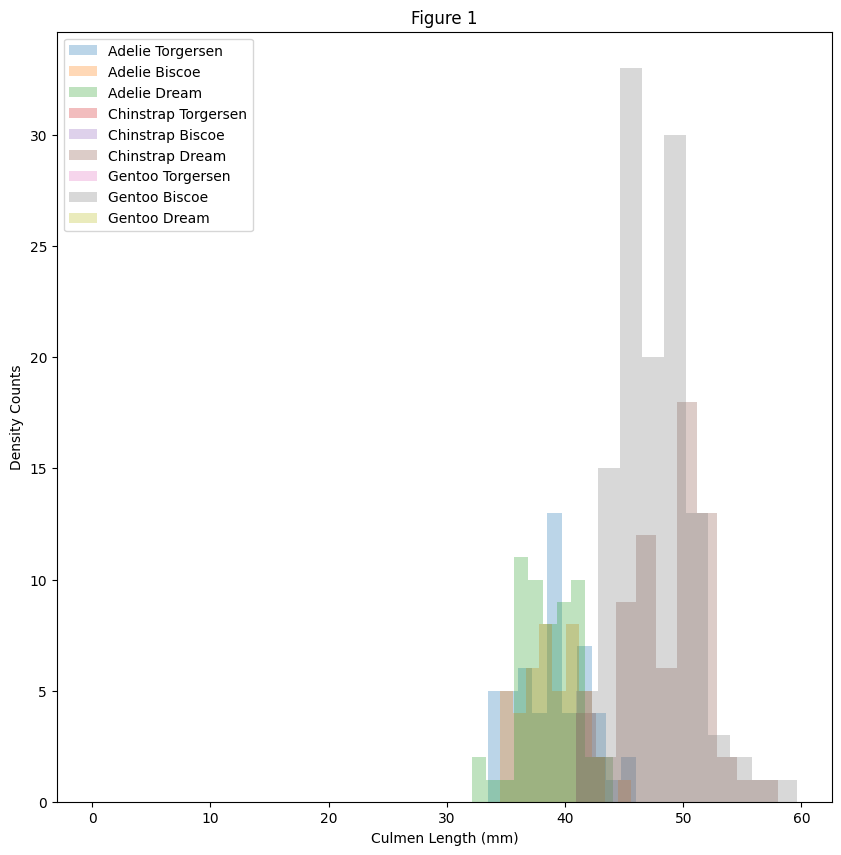

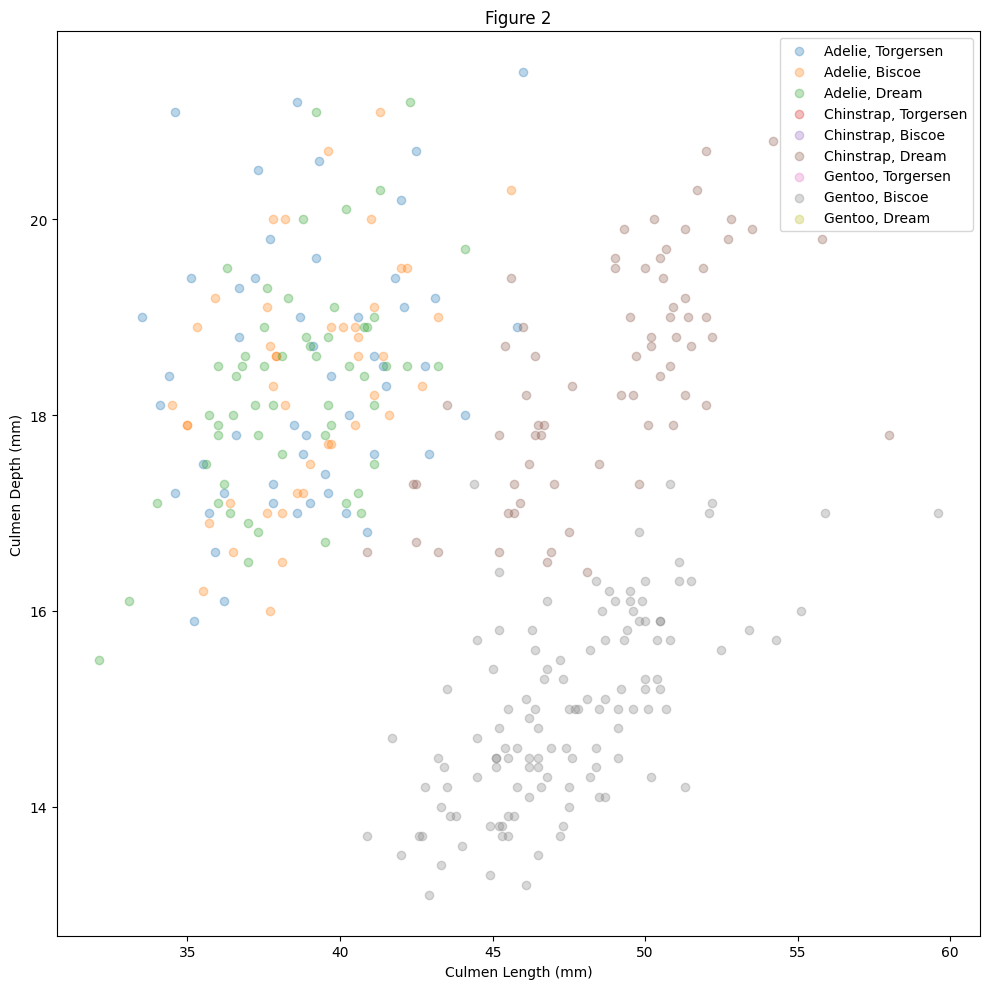

In [ ]:
figI, axI = plt.subplots(1, figsize = (10,10)) #create plot
axI.set(xlabel = "Culmen Length (mm)", #set axes labels
ylabel = "Density Counts")
for s in penguins['Species'].unique(): #for each unique species
    specieset = penguins[penguins['Species'] == s]
    for i in penguins['Island'].unique(): #for each unique Island
        islandset = specieset[specieset['Island'] == i]
        axI.hist(islandset['Culmen Length (mm)'], alpha = 0.3, label = str(s) +" " + str(i)) #plot culmen length
plt.title('Figure 1')
axI.legend()

figK, axK = plt.subplots(1, figsize = (10,10)) #create plot
axK.set(xlabel = "Culmen Length (mm)", #set axes labels
       ylabel = "Culmen Depth (mm)")
for s in penguins['Species'].unique(): #for each unique species
    specieset = penguins[penguins['Species'] == s]
    for i in penguins['Island'].unique(): #for each unique island
        islandset = specieset[specieset['Island'] == i] #plot scatterplot of culmen length vs culmen depth
        axK.scatter(islandset['Culmen Length (mm)'], islandset['Culmen Depth (mm)'], alpha = 0.3, label = str(s.split()[0]) +", " + str(i))
plt.title('Figure 2')
axK.legend()

plt.tight_layout()

#### Figure 1 & 2
> This histogram plots the density of culmen length of penguins based on species and island. It appears that Gentoo and Chinstrap penguins have the longest culmen lengths, but there are more Gentoo penguins with longer lengths than Chinstrap. Adelie penguins, despite being on all three islands, all have relatively similar culmen length, with shorter lengths than Gentoo and Chinstrap.

> Culmen length appears to be a good predictor of penguin species as there are easily recognizable differences between the species regarding it. One thing to look out for is that both Gentoo and Chinstrap penguins appear to have similar culmen length, the only difference being the amount of penguins having this length.

> This scatterplot plots culmen length vs. culmen depth for penguin species and islands. It appears that Gentoo penguins tend to have longer culmen lengths but shorter culmen depths. Chinstrap penguins also have similar culmen lengths to Gentoo penguins but have larger culmen depths than Gentoo penguins. Adelie penguins have shorter culmen lengths but larger culmen depths.

> Culmen length and culmen depth look to be good predictors of penguin species as each species appears to have its own, identifiable cluster on the scatterplot.

---

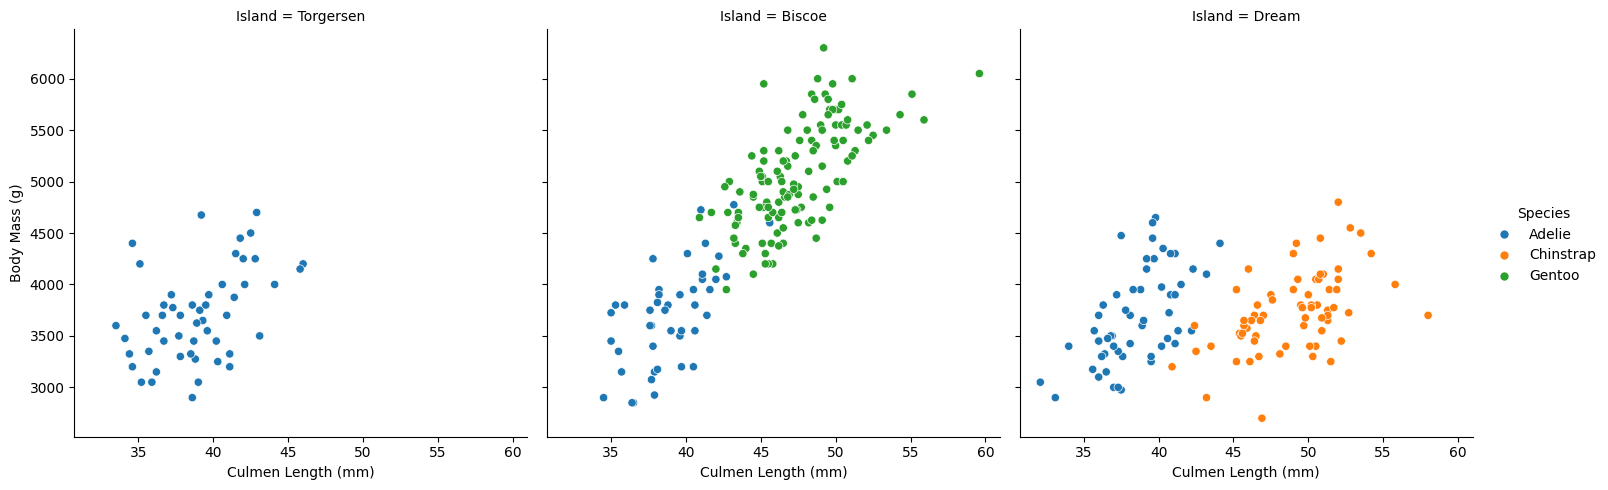

In [ ]:
sns.relplot(data = penguins, x = "Culmen Length (mm)", hue = "Species", y = "Body Mass (g)", col = "Island")

#### Figure 3
> This is a faceted scatterplot that plots penguin culmen length vs. body mass on each island. Once again, we see that only Adelie penguins are on Torgersen. On Biscoe, Adelie penguins have both shorter culmen length and smaller body mass than Gentoo penguins. On dream, Adelie and Chinstrap penguins have similar body masses but Chinstrap penguins have longer culmen length.

> Island, body mass, and culmen length appear to be good predictor variables for penguin species because once again, Gentoo and Chinstrap penguins are only on one island. If the island is Torgersen, then we know that only Adelie penguins are on that island. Furthermore, on Dream and Biscoe where there are two species, the two species each cluster together based on culmen length and body mass which makes it easy to identify penguin species based on these measurements.

---

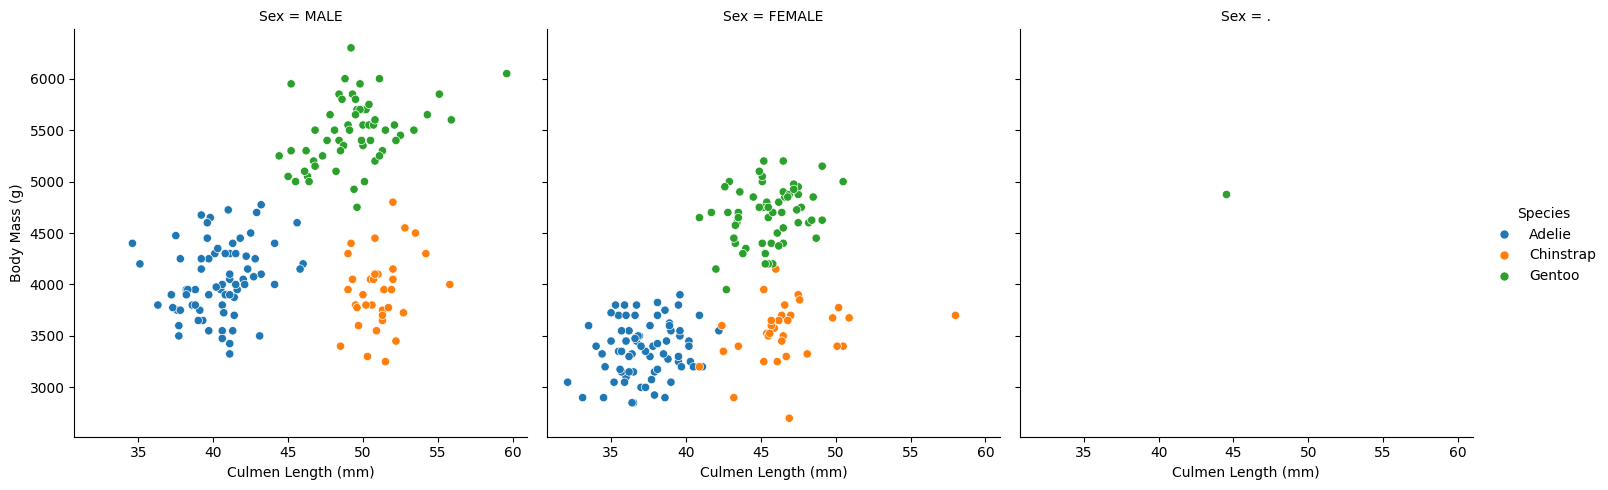

In [ ]:
sns.relplot(data = penguins, x = "Culmen Length (mm)", hue = "Species", y = "Body Mass (g)", col = "Sex")

#### Figure 4
> This faceted scatterplot plots culmen length vs. body mass also, but instead separates each graph by sex. There appear to be three distinct clusters, one for each penguin, for male and female penguins. So across male and female penguins, Gentoo penguins have the largest body mass while Adelie and Chinstrap have similar body masses. Adelie penguins have shorter culmen lengths while Chinstrap and Gentoo penguins have similar lengths.

> Sex also looks like it has the potential to be a good predictor variable as the three species cluster together between sexes. This plot also reinforces the idea that body mass and culmen length could be good predictor variables together.

---

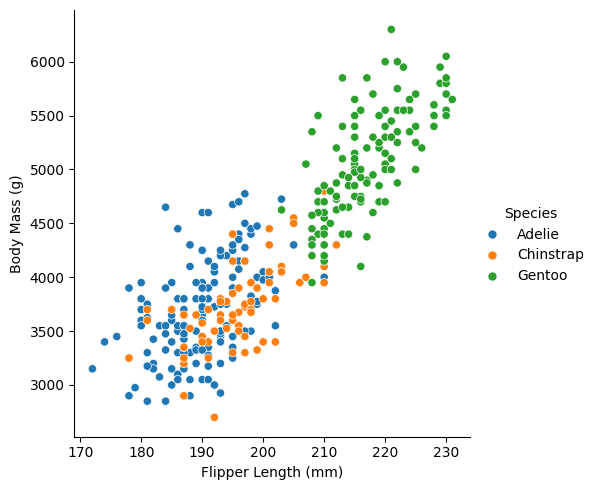

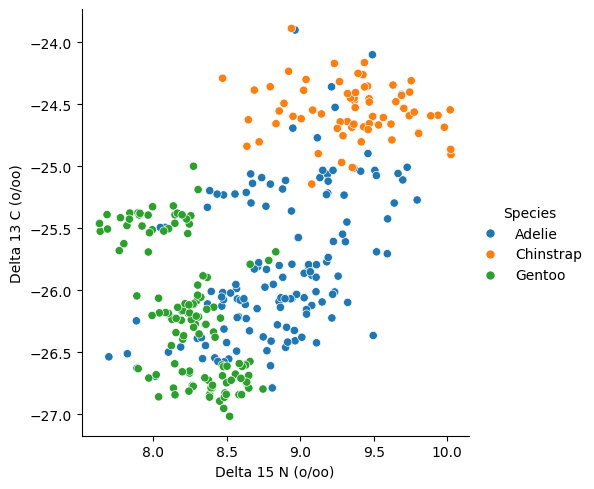

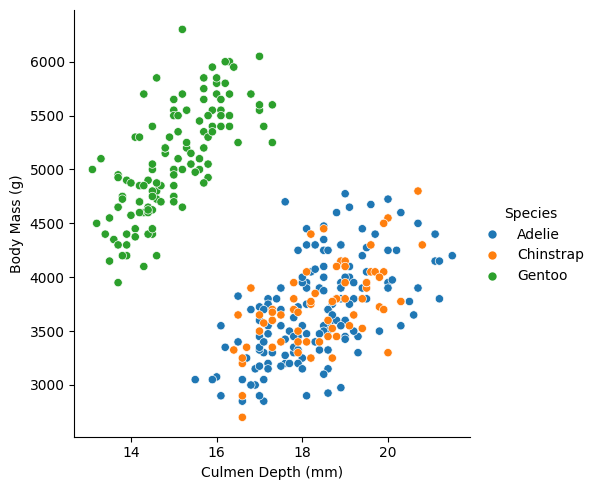

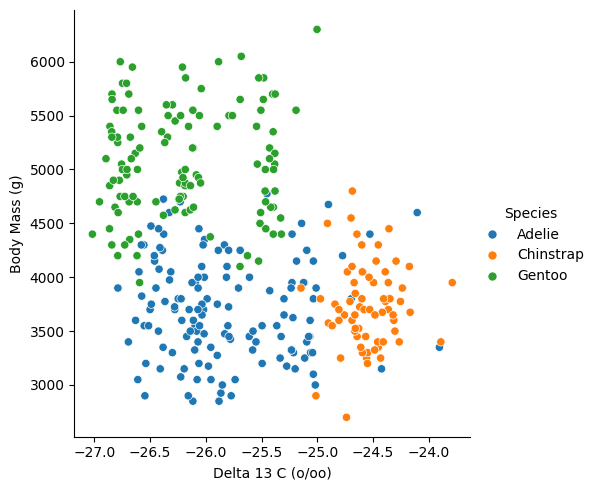

In [ ]:
sns.relplot(data = penguins, x = "Flipper Length (mm)", hue = "Species", y = "Body Mass (g)")
sns.relplot(data = penguins, x = "Delta 15 N (o/oo)", hue = "Species", y = "Delta 13 C (o/oo)")
sns.relplot(data = penguins, x = "Culmen Depth (mm)", hue = "Species", y = "Body Mass (g)")
sns.relplot(data = penguins, x = "Delta 13 C (o/oo)", hue = "Species", y = "Body Mass (g)")

#### Figure 5, 6, 7, and 8
 > *Some words*

<ipython-input-14-db11a0ec8e4d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-14-db11a0ec8e4d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(
<ipython-input-14-db11a0ec8e4d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-14-db11a0ec8e4d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(
<ipython-input-14-db11a0ec8e4d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catp

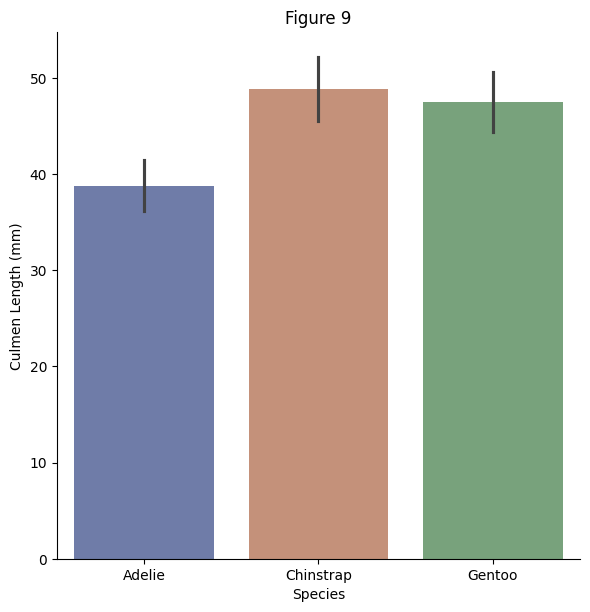

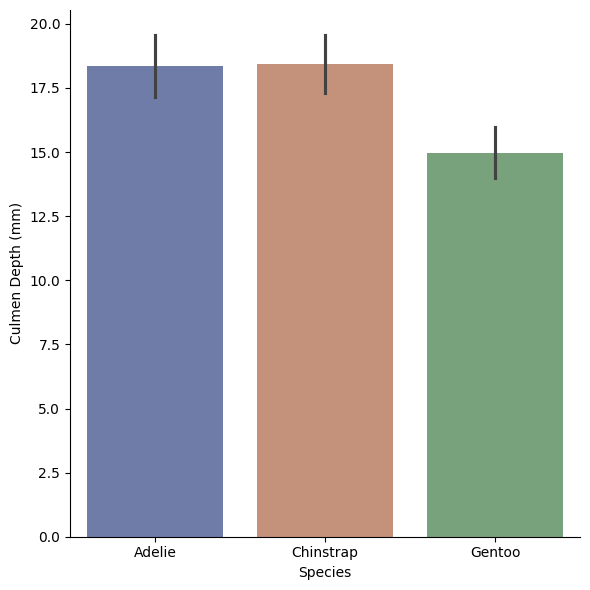

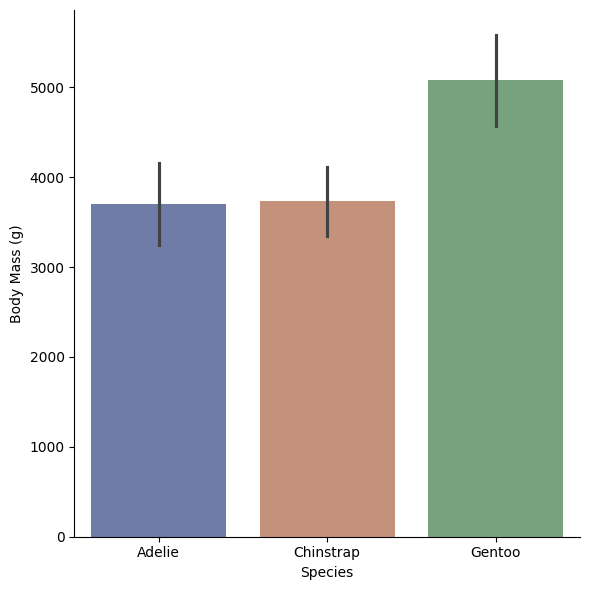

In [ ]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']

for i in range(len(cols)):
    g = sns.catplot(
        data=penguins, kind="bar",
        x="Species", y= cols[i],
        ci="sd", palette="dark", alpha=.6, height=6)

    if (i == 0):
        g.set(title = "Figure 9")

#### Figure 9
> These bar graphs show culmen length, culmen depth, and body mass for each species. Adelie and Chinstrap penguins appear to have very similar culmen depths and body masses. The largest differences on the bar graphs are Gentoo penguins having largest body mass, Gentoo penguins having smallest culmen depth, and Adelie penguins having smallest culmen length.

> For each feature, it appears that there are always two penguins that are very similar in measurement and the third penguin has a visible difference between the others.

***

# Feature Selection

Solely based on our exploratory data analysis, our predictor variables would be Island, Culmen Length (mm), and Body Mass (g).

As seen in the data tables and graphs Gentoo penguins are only found on the island of Biscoe. Chinstrap penguins are only found on Dream, and Adelie penguins are found on Torgersen, Biscoe, and Dream. Therefore, if a penguin is found on the island of Torgersen, then we know that it is definitely an Adelie penguin. If a penguin is on Biscoe, then we already know that it is either Adelie or Gentoo. If a penguin is on Dream, then we already know that it is Chinstrap or Adelie. By using Island as a predictor variable, then we are already able to narrow down a penguin's species to one or two options. If the penguin is on Dream or Biscoe, then we can use our other quantitative variables to determine which of the two species that the penguin is.

The scatterplots that plot Culmen Length and Body Mass in our exploratory data analysis section appear to show the species clustering in the most distinct regions with little to no overlap between the species. In contrast, when plotting other quantitative variables like Flipper Length, Culmen Depth, and Delta 13 C (o/oo) and Delta 15 C (o/oo), there was much more overlap between two or even three species which would make it difficult to predict penguin species based on those features.

The scatterplots that plotted Culmen Length vs. Body Mass separated by Island are the best example of why we are selecting these features for our prediction. On Torgersen, there are only the Adelie penguins plotted. On Biscoe, there appears to be a clear definition between Adelie and Gentoo penguins based on their culmen length and body mass. Similarly, Adelie and Chinstrap penguins appear to be clustered on their own on the Dream graph.None of the other plots show this level of distinction between all three species.

We are not using sex as our quantitative variable because although the scatterplot where we plotted Culmen Length vs. Body Mass grouped by Sex also showed three distinct clusters for the three species, it can be easy to mistake a smaller female penguin for a male penguin of a different species (or vice versa). We will use the automated feature selection  model below to officially choose.


In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from itertools import combinations

def check_column_score(cols):
    """
    Trains and evaluates a model via 5-fold cross-validation on the columns of the data
    with selected indices
    """
    LR = LogisticRegression()
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

all_cols = list(penguins.drop(columns=['Species']).columns)
combos = [list(t) for t in combinations(all_cols, 3)]

combo_cv = []
for cols in combos:
    x = check_column_score(cols)
    combo_cv.append([cols, x])

combo_df= pd.DataFrame(combo_cv, columns = ['Variables', 'CV_Score'])
sort = combo_df.sort_values(by = 'CV_Score', ascending=False).reset_index(drop=True)
print(f"Best combination is {sort['Variables'][0]} with CV score of {sort['CV_Score'][0]}")

Best combination is ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'] with CV score of 0.9923076923076923


> While an automated feature selection code selected the best combination to be  
- [Culmen Length, Culmen Depth, Delta 13C],

> we recognize that these are all quantitative measurements. If we look at the combination that contains one categorical variable, we find (from our sort df below) that
- [Culmen Length (mm), Culmen Depth (mm), Sex] yields an average cross validtion score of **0.984906**.

> We will go with this as the CV value is better than our 'by-eye' feature selection.

In [ ]:
sort

,Variables,CV_Score
0,"[Culmen Length (mm), Culmen Depth (mm), Delta ...",0.992308
1,"[Culmen Length (mm), Culmen Depth (mm), Body M...",0.988534
2,"[Culmen Length (mm), Culmen Depth (mm), Flippe...",0.984761
3,"[Culmen Length (mm), Culmen Depth (mm), Sex]",0.984688
4,"[Culmen Length (mm), Culmen Depth (mm), Delta ...",0.980914
5,"[Culmen Length (mm), Flipper Length (mm), Delt...",0.977213
6,"[Island, Culmen Length (mm), Culmen Depth (mm)]",0.977141
7,"[Island, Culmen Length (mm), Sex]",0.973367
8,"[Culmen Length (mm), Sex, Delta 13 C (o/oo)]",0.973367
9,"[Culmen Length (mm), Delta 15 N (o/oo), Delta ...",0.965675


In [ ]:
pcols = ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] #columns used for modeling in the following section

# Modeling General Functions

- Random Forest
- Support Vector Machines
- Neural Networks

**Some words of exposition about the general functions***

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import *

def modeling(model, cols, cv_val=20):
    """


    """
    model.fit(X_train[cols].values, y_train.values)
    score = model.score(X_test[cols].values, y_test.values)
    crossvalscore = cross_val_score(model, X_train[cols], y_train, cv = cv_val).mean()
    return score, crossvalscore

In [ ]:
def cross_val_complexity(model, cols, r1=1, r2=11, r3=1, cv_val=20):
    """
    r1 is the lower bound of the complexity range
    r2 is the upper bound of the complexity range
    r3 is the number of  step
    model is the class (i.e. model = 'tree.DecisionTreeClassifier' or model = 'RandomForestClassifier')
    """
    fig, ax = plt.subplots(1, figsize = (10, 7))
    best_score = 0 #set the best score to 0

    for d in range(r1, r2, r3):
        T = model(max_depth=d)
        T.fit(X_train[cols], y_train)

        cv_score = cross_val_score(T, X_train[cols], y_train, cv= cv_val).mean() #compute the cross validation score on the model with max_depth d
        l = ax.scatter(d, cv_score, color = "black") #plot the cross validation score
        if cv_score > best_score: #if the cross validation score with max_depth d is larger than the best score, set the best score to it
            best_depth = d
            best_score = cv_score

    l = ax.set(title = "Best Depth : " + str(best_depth), #label the plot
               xlabel = "Depth/Complexity",
               ylabel = "CV Score")

    plt.show()
    return best_depth

In [ ]:
def confus_matrix(model, cols):
    """

    """
    model = model.fit(X_train[cols].values, y_train.values)
    preds = model.predict(X_test[cols])
    cf_model = confusion_matrix(y_test, preds)

    ax = sns.heatmap(cf_model, annot=True, cmap='Blues')

    ax.set_title(f'{model} Confusion Matrix with Species\n');
    ax.set_xlabel('\nPredicted Species')
    ax.set_ylabel('Actual Species ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Adelie','Chinstrap', 'Gentoo'])
    ax.yaxis.set_ticklabels(['Adelie','Chinstrap', 'Gentoo'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    return ax

In [ ]:
def plot_regions(c, X, y):
    """
    This function takes in the model, the predictor variables, and the target variable as its arguments.
    The function then uses these inputs in order to plot a decision region.
    """
    # for convenience, give names to the two columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']

    # create a grid
    grid_x = np.linspace(x0.min()-1,x0.max()+1,501)
    grid_y = np.linspace(x1.min()-1,x1.max()+1,501)
    xx, yy, zz = np.meshgrid(grid_x, grid_y, np.array([0,1])) #0=Female and 1=Male

    # extract model predictions, using the np.c_ attribute to join together the two parts of the grid.
    # array.ravel() converts an multidimensional array into a 1d array
    # we use array.reshape() to turn the resulting predictions p back into 2d
    XX = xx.ravel()
    YY = yy.ravel()
    ZZ = zz.ravel()
    XY = np.c_[XX, YY]
    XYZ = np.c_[XX, YY, ZZ]

    p = c.predict(XYZ)
    p = p.reshape(xx.shape)

        # create the plot
    fig, ax = plt.subplots(1,3)

    # use contour plot to visualize the predictions
    ax[0].contourf(xx[:,:,0], yy[:,:,0], p[:,:,0], cmap = "jet", alpha = 0.2)
    ax[1].contourf(xx[:,:,1], yy[:,:,1], p[:,:,1], cmap = "jet", alpha = 0.2)

    # plot the data
    ax[0].scatter(x0[X['Sex']==0], x1[X['Sex']==0], c = y[X['Sex']==0], cmap = "jet")
    ax[1].scatter(x0[X['Sex']==1],x1[X['Sex']==1],c=y[X['Sex']==1],cmap="jet")
    ax[0].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Female")
    ax[1].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Male")

    plt.tight_layout()
    plt.show()

In [ ]:
# from sklearn import preprocessing
# def draw(df,model ):
#     le = preprocessing.LabelEncoder()
#     df['label'] = le.fit_transform(df['Species'])
#     plot_regions(model, df[['Culmen Length (mm)', 'Island', 'Body Mass (g)']], df['label'], df.name)
# def draw_rfc(df):
#     le = preprocessing.LabelEncoder()
#     df['label'] = le.fit_transform(df['Species'])
#     plot_regions(rfc, df[['Culmen Length (mm)', 'Island', 'Body Mass (g)']], df['label'], df.name)
# def draw_nn(df):
#     le = preprocessing.LabelEncoder()
#     df['label'] = le.fit_transform(df['Species'])
#     plot_regions(nn, df[['Culmen Length (mm)', 'Island', 'Body Mass (g)']], df['label'], df.name)
# def draw_svc(df):
#     le = preprocessing.LabelEncoder()
#     df['label'] = le.fit_transform(df['Species'])
#     plot_regions(svc, df[['Culmen Length (mm)', 'Island', 'Body Mass (g)']], df['label'], df.name)

## Model 1: Random Forest
- cross validation
- evaluation on testing data
- confusion matrix
- decision region visualization
- discussion of data (mistakes and why)

#### Cross Validation for Complexity Selection

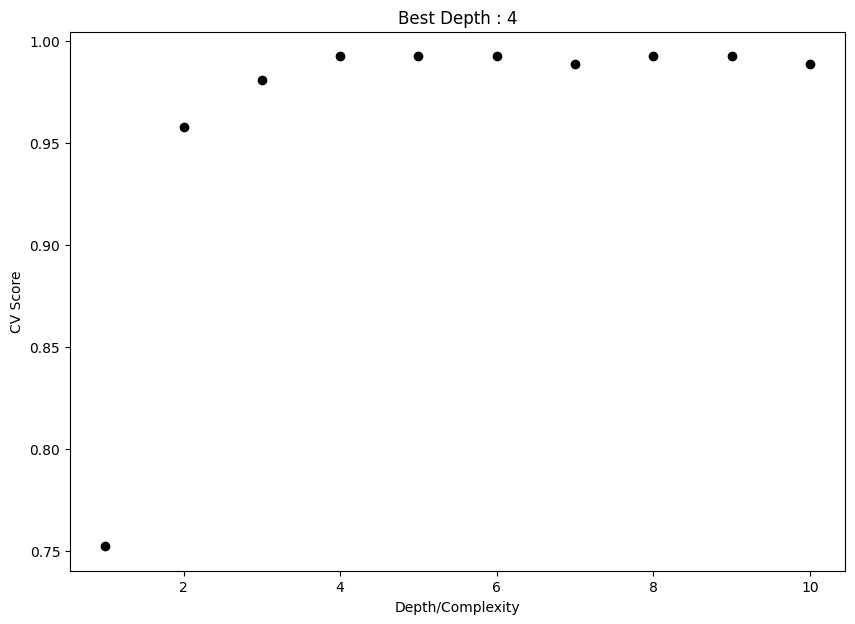

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rf_depth = cross_val_complexity(model=RandomForestClassifier, cols= pcols)

#### Model Evaluation


In [ ]:
rfc = RandomForestClassifier(max_depth = rf_depth)

rf_score, rf_cv_score = modeling(model = rfc, cols = pcols)
print(f'The evaluation score on unseen data for the Random Forest Model is {rf_score.round(3)}.')

The evaluation score on unseen data for the Random Forest Model is 0.873.


#### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


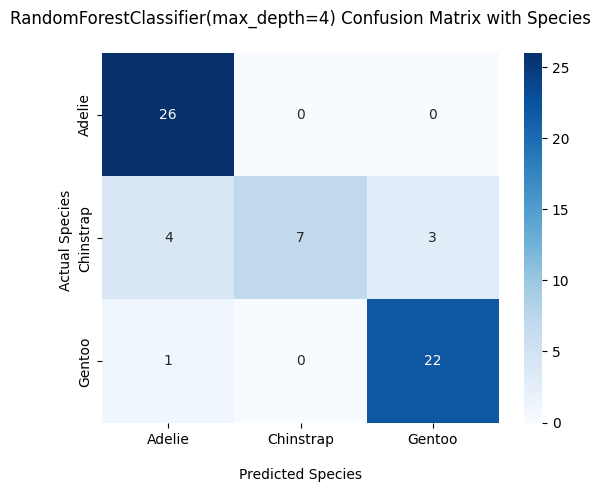

<Axes: title={'center': 'RandomForestClassifier(max_depth=4) Confusion Matrix with Species\n'}, xlabel='\nPredicted Species', ylabel='Actual Species '>

In [ ]:
confus_matrix(model = rfc, cols=pcols)

#### Decision Region

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


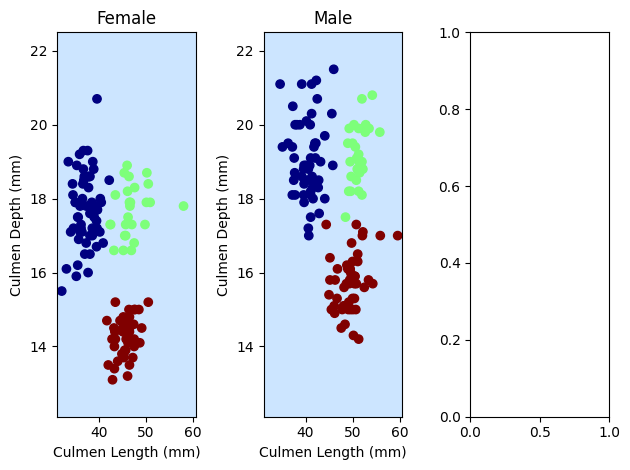

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train[pcols], y_train)
plot_regions(rfc, X_train, y_train)


#### Discussion about Fit

> The accuracy of the random forest model is 0.956, which is very close to 1.0. It only misclassified one Adelie penguin as a Gentoo penguin, and two Adelie penguins as Gentoo based on the confusion matrix. The reason is because there is some overlap between the measurements of body mass and culmen length of Adelie and Gentoo penguins as seen in the decision regions plot.

## Model 2: Neural Networks
- cross validation
- evaluation on testing data
    - confusion matrix
- decision region visualization
- discussion of data (mistakes and why)

**note find way to catch the warnings and temp surpress using import warnings**

#### Cross Validation for Complexity Selection

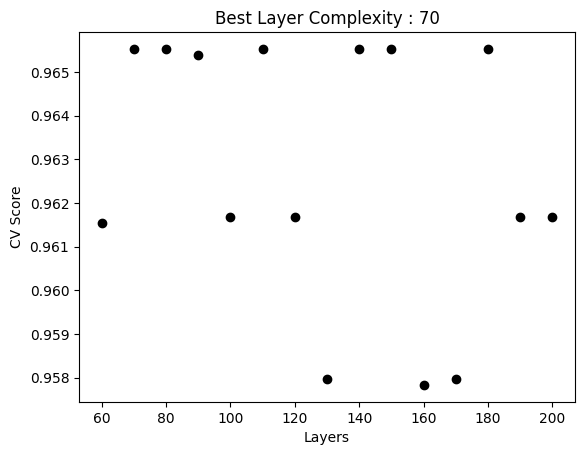

In [ ]:
from sklearn.neural_network import MLPClassifier

fig, ax = plt.subplots(1) #create a plot to visualize the cross validation scores
best_score = 0 #set the best score to 0

#cross validation to choose the best hidden layer size for the neural network

for d in range(60,210,10): #loop from 60 to 200
    pos_size = d
    MLP = MLPClassifier(solver = "lbfgs",
                        alpha = 1e-5,
                        hidden_layer_sizes = (pos_size, pos_size, pos_size, pos_size),
                        random_state = 0)
    cv_score = cross_val_score(MLP, X_train[pcols], y_train, cv=10).mean() #compute the cross validation score on the model with max_depth d
    ax.scatter(pos_size, cv_score, color = "black") #plot the cross validation score
    if cv_score > best_score: #if the cross validation score with max_depth d is larger than the best score, set the best score to it
        best_depth = pos_size
        best_score = cv_score

l = ax.set(title = "Best Layer Complexity : " + str(best_depth), #label the plot
       xlabel = "Layers",
       ylabel = "CV Score")


#### Model Evaluation


In [ ]:
pos_size = best_depth
nn = MLPClassifier(solver = "lbfgs",
                   alpha = 1e-5,
                   hidden_layer_sizes = (pos_size, pos_size, pos_size, pos_size),
                   random_state = 0)
nn_score, nn_cv_score = modeling(nn, cols = pcols, cv_val=20)
print(f'The evaluation score on unseen data for the Neural Network Model is {nn_score.round(3)}.')

The evaluation score on unseen data for the Neural Network Model is 0.952.


#### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


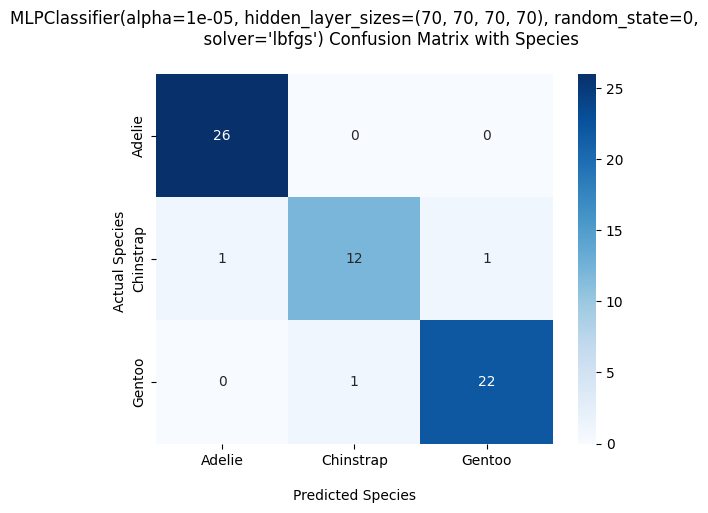

<Axes: title={'center': "MLPClassifier(alpha=1e-05, hidden_layer_sizes=(70, 70, 70, 70), random_state=0,\n              solver='lbfgs') Confusion Matrix with Species\n"}, xlabel='\nPredicted Species', ylabel='Actual Species '>

In [ ]:
confus_matrix(model = nn, cols=pcols)

#### Decision Region

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


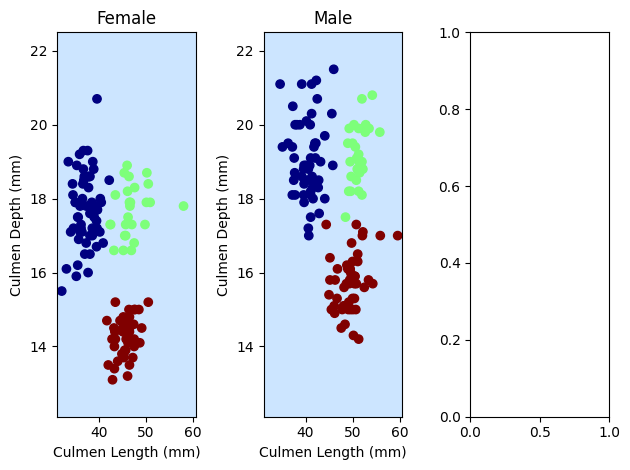

In [ ]:
nn.fit(X_train[pcols],y_train)
plot_regions(c=nn, X=X_train[pcols], y=y_train)

> The accuracy of the Neural Network model is 0.96, which is extremely close to 1. This points to a very high accuracy score, which can be attributed to its parallel processing ability that allows it to numerically assigns the many points present. Although the Neural Network has an extremely high accuracy score, overfitting may be a possible issue. The confusion matrix shows that the model mistook Adelie as Gentoo two times. This perhaps can be due to having very similar measurements for Delta 13 C (o/oo) and Culmen Length.

## Support Vector Machines
- cross validation
- evaluation on testing data
    - confusion matrix
- decision region visualization
- discussion of data (mistakes and why)

#### Cross Validation for Complexity Selection

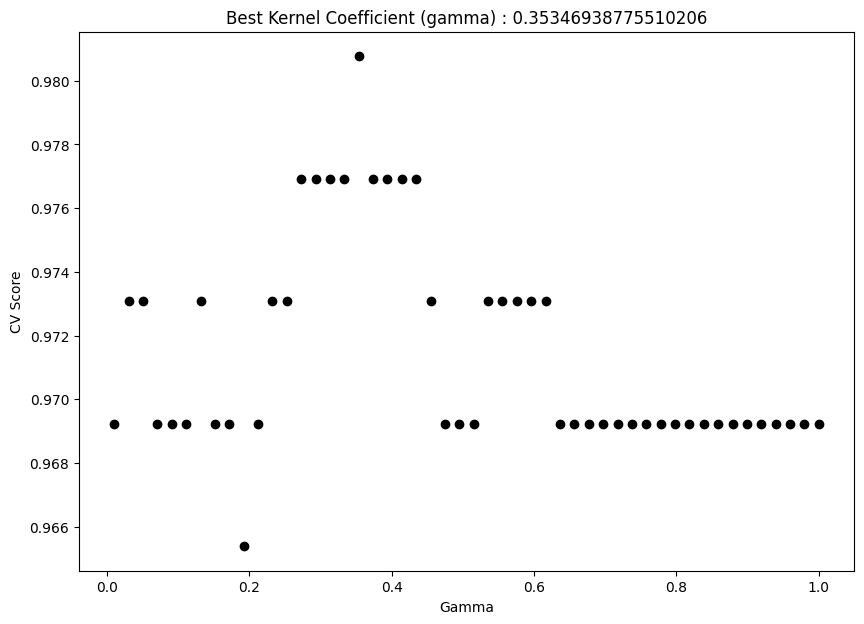

In [ ]:
from sklearn.svm import SVC

fig, ax = plt.subplots(1, figsize = (10, 7))
best_score = 0 #set the best score to 0

for g in np.linspace(0.01,1,50):
    T = SVC(kernel='rbf', C=1, gamma=g)
    T.fit(X_train[pcols], y_train)

    cv_score = cross_val_score(T, X_train[pcols], y_train, cv= 20).mean() #compute the cross validation score on the model with max_depth d
    l = ax.scatter(g, cv_score, color = "black") #plot the cross validation score
    if cv_score > best_score: #if the cross validation score with max_depth d is larger than the best score, set the best score to it
        best_gam = g
        best_score = cv_score
l = ax.set(title = "Best Kernel Coefficient (gamma) : " + str(best_gam), #label the plot
       xlabel = "Gamma",
       ylabel = "CV Score")

plt.show()

#### Model Evaluation


In [ ]:
svc = SVC(kernel='rbf', C=1, gamma=best_gam, degree = 4)
svc_score, svc_cv_score = modeling(svc, cols=pcols, cv_val=20)
print(f'The evaluation score on unseen data for the Support Vector Machine Model is {svc_score.round(3)}.')

The evaluation score on unseen data for the Support Vector Machine Model is 0.889.


#### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


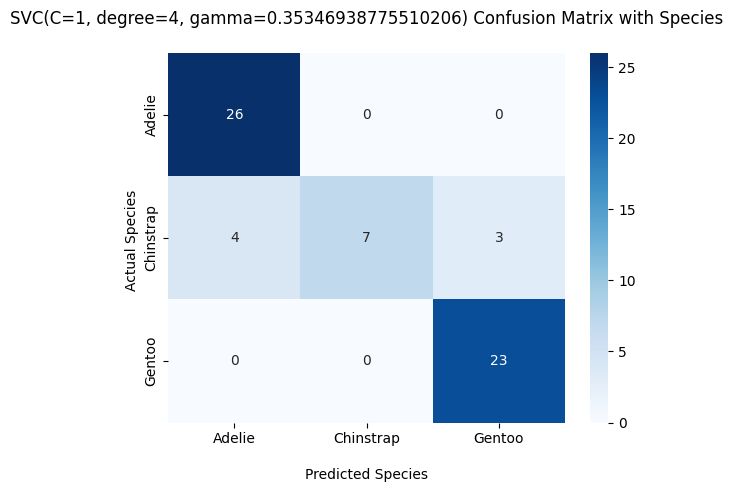

<Axes: title={'center': 'SVC(C=1, degree=4, gamma=0.35346938775510206) Confusion Matrix with Species\n'}, xlabel='\nPredicted Species', ylabel='Actual Species '>

In [ ]:
confus_matrix(model=svc, cols=pcols)

#### Decision Region

In [ ]:
# svc.fit(X_train[pcols],y_train)
svc.fit(X_all, y_all)
plot_regions(c=svc, X=X_all, y=y_all)

NameError: name 'X_all' is not defined

#### Discussion about Fit
> The model is great at predicting the penguin species.

# Conclusion
Overall, the random forests model performed near perfectly when it comes to predicitng penguin species with average accuracy close to 100%, the support vector machines model performed slightly above chance level accuracy (78%), and the neural network model performed below chance level accuracy. We recommend using a random forest classifier model using the features of Island, Culmen Length, and Body Mass. If the three features could be all quantitative, then our feature selection model suggests using the combination of Culmen Length, Culmen Depth, and Delta 13C, which would net a higher cross validation score and likely improve your algorithm. The model could be improved if **stm stm**

Additionally, we would like to acknowledge a few models that we attempted but found insuffient. First we had attempted using a K-Means clusting model but since our species data are not circularly clustered, this would be a poor model to select. Next we had trued a SVM with a linear and poly-nomial kernal, both which performed worse that the eventual RGB kernal we have displayed here. Finally, we had also attempted a multinomial regression model which had high accuracy, but becuase it did not have a complexity parameter that we could refine, we opted for another which allowed greater control.
